## Drosophila Examples for Pairwise Alignment

In [10]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '2'
import sys
sys.path.insert(0,'../')
import morpho
import matplotlib.pyplot as plt
import scanpy
import numpy as np
from jupyterthemes import jtplot
jtplot.style(theme="onedork")
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
slice_colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3']
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
# data_dir='../data/E3_5_4h_d/bin20_data'
data_dir='../data/E3_5_4h_d/final_seg_data'
file_list = sorted(os.listdir(data_dir))
print(file_list)

['E3.5-4h_d_S03_seg.h5ad', 'E3.5-4h_d_S04_seg.h5ad', 'E3.5-4h_d_S05_seg.h5ad', 'E3.5-4h_d_S06_seg.h5ad', 'E3.5-4h_d_S07_seg.h5ad', 'E3.5-4h_d_S08_seg.h5ad', 'E3.5-4h_d_S10_seg.h5ad', 'E3.5-4h_d_S11_seg.h5ad', 'E3.5-4h_d_S12_seg.h5ad', 'E3.5-4h_d_S13_seg.h5ad', 'E3.5-4h_d_S14_seg.h5ad', 'E3.5-4h_d_S15_seg.h5ad', 'E3.5-4h_d_S16_seg.h5ad', 'E3.5-4h_d_S17_seg.h5ad', 'E3.5-4h_d_S18_seg.h5ad', 'E3.5-4h_d_S19_seg.h5ad', 'E3.5-4h_d_S20_seg.h5ad', 'E3.5-4h_d_S21_seg.h5ad', 'E3.5-4h_d_S22_seg.h5ad', 'E3.5-4h_d_S23_seg.h5ad', 'E3.5-4h_d_S24_seg.h5ad']


In [12]:
# data_dir='../data/E3_5_4h_d/bin20_data'
data_dir='../data/E3_5_4h_d/final_seg_data'
slices = [scanpy.read_h5ad(os.path.join(data_dir, file_name)) for file_name in sorted(os.listdir(data_dir))]

In [16]:
%matplotlib auto
i = 5
print(file_list[i])
BAS_slices = [slice.copy() for slice in slices]
sliceA = BAS_slices[i]
sliceB = BAS_slices[i + 1]
sliceA_align, sliceB_align, P = morpho.morpho_align_pairwise(
            model=sliceA,
            model_ref=sliceB,
            spatial_key="spatial",
            key_added="align_spatial",
            select_high_exp_genes=False,
            normalize_c=True,
            normalize_g=False,
            mode="SN",
            max_iter=100,
            vis_optimiation=True,
            print_info=True,
            use_gpu = True,
            use_SVI = False,
            batch_size_param = 100,
            beta = 0.05,
            beta2 = 0.1,
            lambdaVF = 1e2,
            )


Using matplotlib backend: agg
E3.5-4h_d_S08_seg.h5ad
|-----> Start alignment based on morph, mode: SN.
|-----> Filtered all samples for common genes. There are 7149 common genes.
|-----> Coordinates normalization param:
|-----------> Mean: tensor([368.7516, 411.0264], device='cuda:0', dtype=torch.float64), tensor([225.8026, 417.4072], device='cuda:0', dtype=torch.float64).
|-----------> Scale: 255.1214658958913.
|-----> [Start morpho alignment] in progress: 100.0000%
|-----> [Start morpho alignment] finished [0.6772s]


MovieWriter ffmpeg unavailable; using Pillow instead.


In [17]:
import paste as pst
import ot
import time
sliceA_paste, sliceB_paste = slices[i].copy(), slices[i+1].copy()
t1 = time.time()
pi = pst.pairwise_align(sliceA_paste, sliceB_paste, use_gpu=True,backend = ot.backend.TorchBackend())
pis = [pi]
new_slices = pst.stack_slices_pairwise([sliceA_paste, sliceB_paste], pis)
t2 = time.time()
print("Paste costs {:.5} s".format(t2-t1))

gpu is available, using gpu.
Paste costs 6.958 s


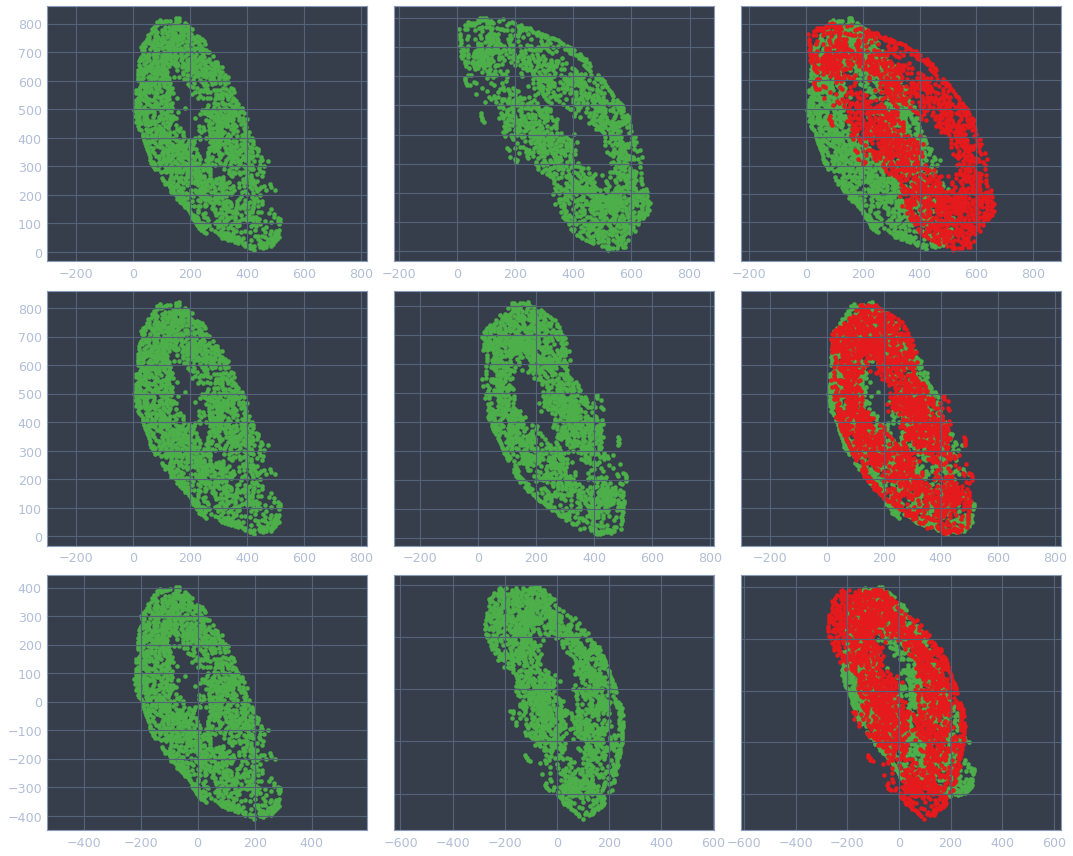

In [18]:
%matplotlib inline
fig, axs = plt.subplots(3, 3,figsize=(15,12))
plot_slices(sliceA_align, sliceB_align,axs[0],'spatial',slice_colors,20)
plot_slices(sliceA_align, sliceB_align,axs[1],'align_spatial',slice_colors,20)
plot_slices(new_slices[0], new_slices[1],axs[2],'spatial',slice_colors,20)
plt.tight_layout()
plt.show()

In [7]:
def plot_slices(sliceA_align, sliceB_align, axs, spatial_key, slice_colors,dot_size):
    xmin,xmax = np.min([np.min(sliceB_align.obsm[spatial_key][:,0]),np.min(sliceA_align.obsm[spatial_key][:,0])]),np.max([np.max(sliceB_align.obsm[spatial_key][:,0]),np.max(sliceA_align.obsm[spatial_key][:,0])])
    ymin,ymax = np.min([np.min(sliceB_align.obsm[spatial_key][:,1]),np.min(sliceA_align.obsm[spatial_key][:,1])]),np.max([np.max(sliceB_align.obsm[spatial_key][:,1]),np.max(sliceA_align.obsm[spatial_key][:,1])])
    # dot_size = 8
    margin = 20
    axs[0].scatter(sliceA_align.obsm[spatial_key][:,0],sliceA_align.obsm[spatial_key][:,1],s=dot_size,c=slice_colors[2])
    axs[0].set_xlim([xmin-margin,xmax+margin])
    axs[0].set_ylim([ymin-margin,ymax+margin])
    axs[0].axis('equal')
    axs[1].scatter(sliceB_align.obsm[spatial_key][:,0],sliceB_align.obsm[spatial_key][:,1],s=dot_size,c=slice_colors[2])
    axs[1].set_xlim([xmin-margin,xmax+margin])
    axs[1].set_ylim([ymin-margin,ymax+margin])
    axs[1].set_yticklabels([])
    axs[1].axis('equal')
    axs[2].scatter(sliceA_align.obsm[spatial_key][:,0],sliceA_align.obsm[spatial_key][:,1],s=dot_size,c=slice_colors[2])
    axs[2].scatter(sliceB_align.obsm[spatial_key][:,0],sliceB_align.obsm[spatial_key][:,1],s=dot_size,c=slice_colors[0])
    axs[2].set_xlim([xmin-margin,xmax+margin])
    axs[2].set_ylim([ymin-margin,ymax+margin])
    axs[2].set_yticklabels([])
    axs[2].axis('equal')

|-----> Start alignment based on morph, mode: SN.
|-----> Filtered all samples for common genes. There are 6184 common genes.
|-----> Start alignment based on morph, mode: SN.
|-----> Filtered all samples for common genes. There are 6666 common genes.
|-----> Start alignment based on morph, mode: SN.
|-----> Filtered all samples for common genes. There are 6870 common genes.
|-----> Start alignment based on morph, mode: SN.
|-----> Filtered all samples for common genes. There are 6632 common genes.
|-----> Start alignment based on morph, mode: SN.
|-----> Filtered all samples for common genes. There are 6819 common genes.
|-----> Start alignment based on morph, mode: SN.
|-----> Filtered all samples for common genes. There are 7149 common genes.
|-----> Start alignment based on morph, mode: SN.
|-----> Filtered all samples for common genes. There are 7291 common genes.
|-----> Start alignment based on morph, mode: SN.
|-----> Filtered all samples for common genes. There are 7316 common

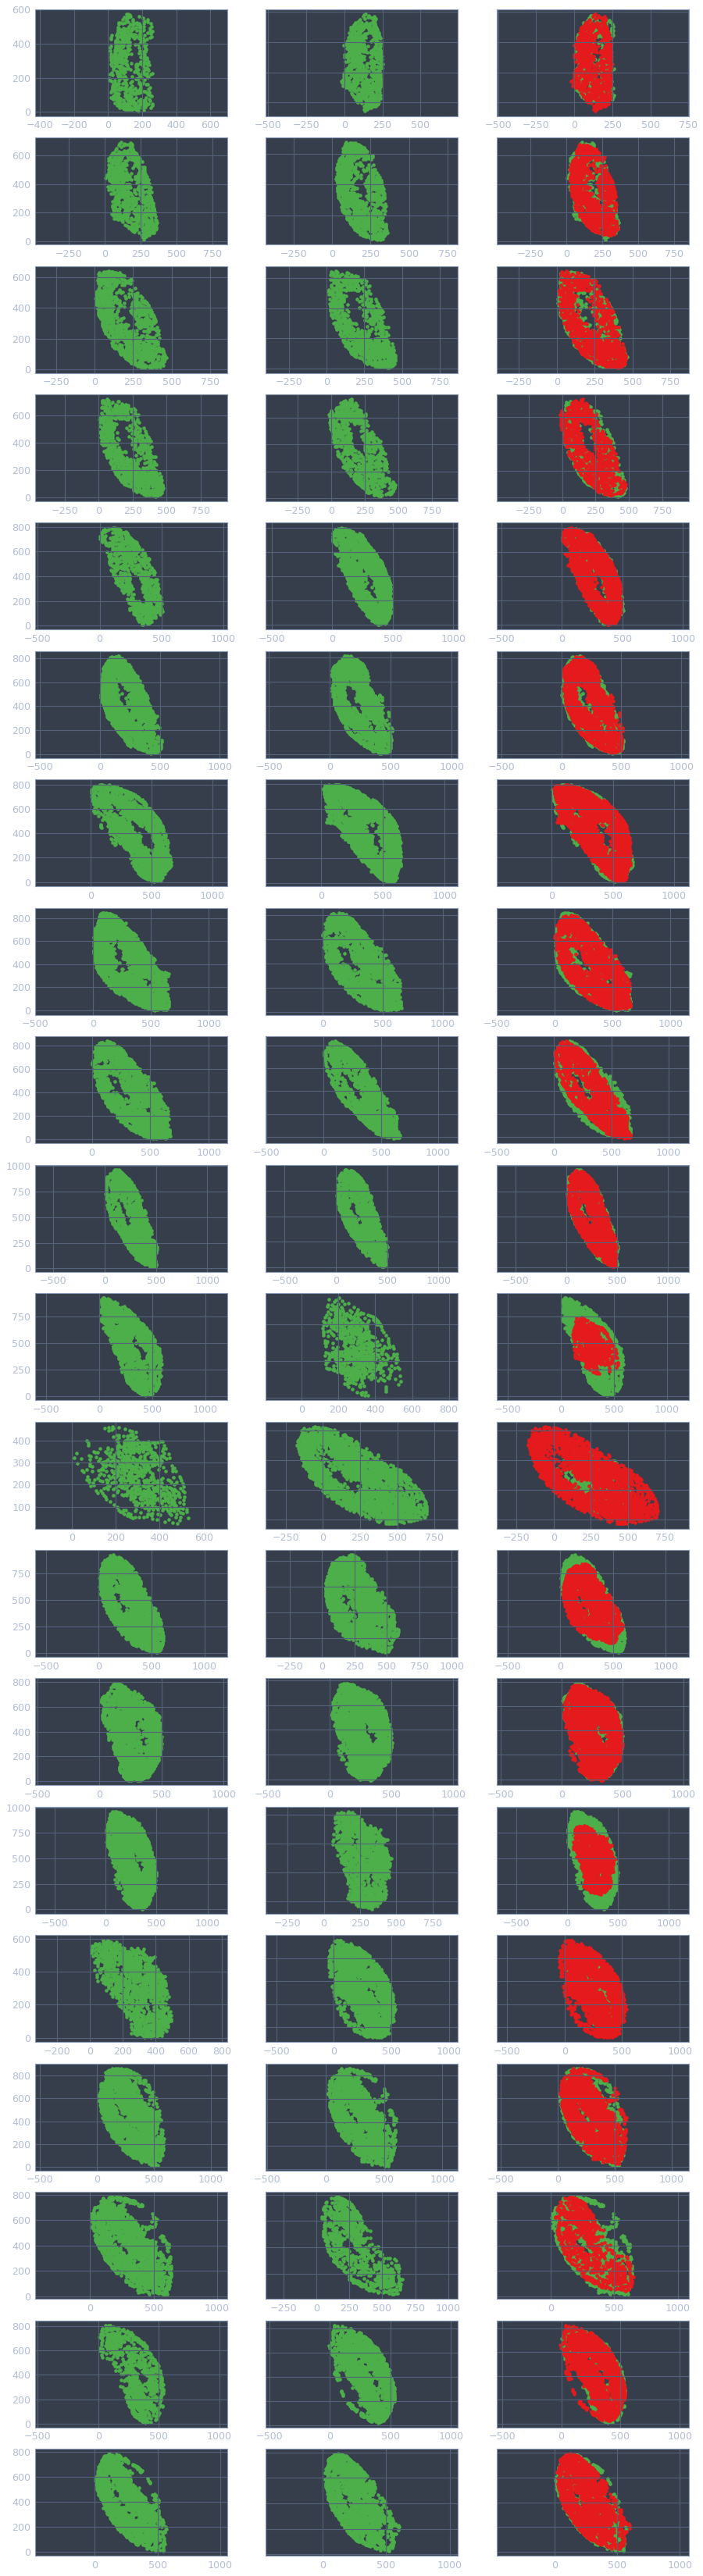

In [9]:
BAS_slices = [slice.copy() for slice in slices]
%matplotlib inline
fig, axs = plt.subplots(len(slices)-1, 3,figsize=(15,(len(slices)-1)*3))
for i in range(len(slices)-1):
    sliceA = BAS_slices[i]
    sliceB = BAS_slices[i + 1]
    sliceA_align, sliceB_align, P = morpho.morpho_align_pairwise(
                model=sliceA,
                model_ref=sliceB,
                spatial_key="spatial",
                key_added="align_spatial",
                select_high_exp_genes=False,
                normalize_c=True,
                normalize_g=False,
                mode="SN",
                max_iter=100,
                vis_optimiation=False,
                print_info=False,
                use_gpu = True,
                use_SVI = False,
                batch_size_param = 100,
                beta = 0.05,
                beta2 = 0.1,
                lambdaVF = 1e2,
                )
    plot_slices(sliceA_align, sliceB_align,axs[i],'align_spatial',slice_colors,20)
